In [27]:
import os
import numpy as np
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

In [28]:
# Define the paths to the images and annotations
IMAGES_DIR = '..\\Dataset\\Images'         # Update with your images directory
ANNOTATIONS_DIR = '..\\Dataset\\Annotations'  # Update with your annotations directory

# Initialize lists to store images and masks
images = []
masks = []

# Get sorted lists of image and annotation filenames
image_filenames = sorted([f for f in os.listdir(IMAGES_DIR) if f.endswith(('.png', '.jpg', '.tif'))])
annotation_filenames = sorted([f for f in os.listdir(ANNOTATIONS_DIR) if f.endswith('.xml')])
 
# Ensure that the number of images and annotations are equal
assert len(image_filenames) == len(annotation_filenames), "Mismatch between images and annotations."

def create_mask_from_xml(xml_path, image_size):
    """
    Parses an XML annotation file and creates a binary mask.
    
    Parameters:
    - xml_path: Path to the XML annotation file.
    - image_size: Tuple indicating the size of the image (width, height).
    
    Returns:
    - mask_array: A NumPy array representing the binary mask.
    """
    # Create a blank mask image
    mask = Image.new('L', image_size, 0)
    draw = ImageDraw.Draw(mask)
    
    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Iterate over all 'Region' elements
    for region in root.findall('.//Region'):
        vertices = []
        for vertex in region.findall('.//Vertex'):
            x = float(vertex.get('X'))
            y = float(vertex.get('Y'))
            vertices.append((x, y))
        
        # Draw the polygon on the mask
        if vertices:
            draw.polygon(vertices, outline=1, fill=1)
    
    # Convert mask to NumPy array
    mask_array = np.array(mask, dtype=np.uint8)
    return mask_array


# Load images and create masks from annotations
for img_name, ann_name in zip(image_filenames, annotation_filenames):
    # Construct full file paths
    img_path = os.path.join(IMAGES_DIR, img_name)
    ann_path = os.path.join(ANNOTATIONS_DIR, ann_name)
    
    # Load image
    image = Image.open(img_path).convert('RGB')  # Convert to RGB
    image_array = np.array(image)
    images.append(image_array)
    
    # Create mask from XML annotations
    mask = create_mask_from_xml(ann_path, image.size)
    masks.append(mask)

# Convert lists to NumPy arrays
images = np.array(images)
masks = np.array(masks)

print(f"Loaded {len(images)} images and created masks from {len(masks)} annotations.")

Loaded 37 images and created masks from 37 annotations.


## Testing the mask creation

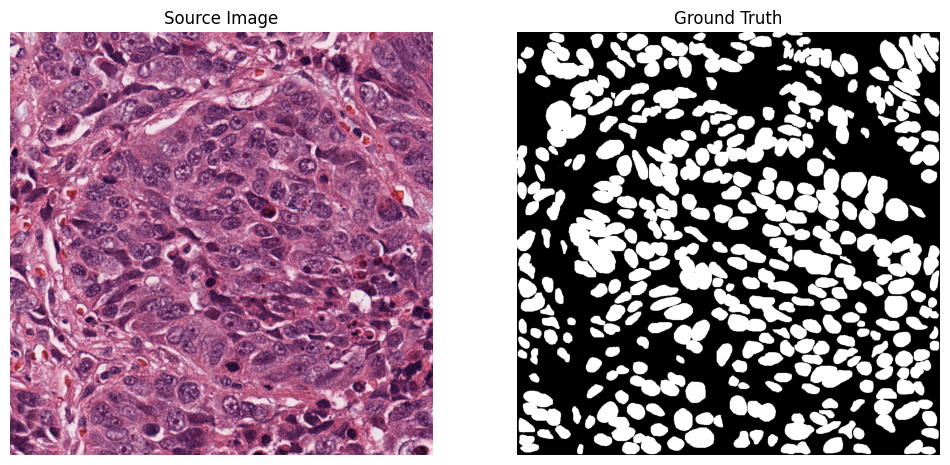

In [34]:
import matplotlib.pyplot as plt

# Test on a single image and mask
test_img = images[5]
test_mask = masks[5]

# Display the image and mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(test_img) 
plt.title('Source Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_mask, cmap='gray')
plt.title('Ground Truth')
plt.axis('off')

plt.show()
